In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
#Data Pre-Processing
dataset = pd.read_csv("Mall_Customers.csv")
x = dataset.iloc[:, [3, 4]].values
df = pd.DataFrame(dataset)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Text(0.5, 0, 'Customers')

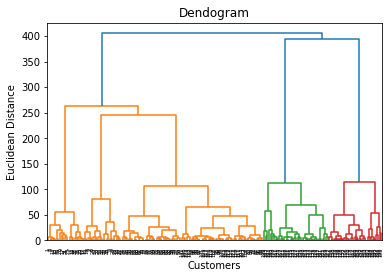

In [14]:
#Finding the optimal number of clusters using the dendrogram
import scipy.cluster.hierarchy as shc
dendro = shc.dendrogram(shc.linkage(x, method="ward"))
plt.title('Dendogram')
plt.ylabel('Euclidean Distance')
plt.xlabel('Customers')

In [22]:
#training the hierarchical model on dataset

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage="ward")
y_pred = hc.fit_predict(x)
df = pd.DataFrame(y_pred)
df

,0
0,4
1,3
2,4
3,3
4,4
...,...
195,2
196,0
197,2
198,0


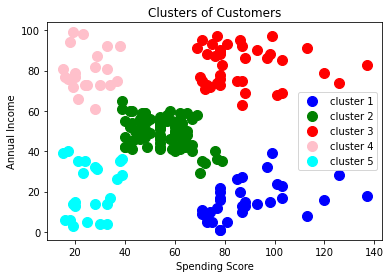

In [23]:
# Visualizing the clusters

plt.scatter( x [ y_pred == 0 , 0 ], x [ y_pred == 0 , 1 ], s = 100 , c = 'blue' , label = 'cluster 1')
plt.scatter( x [ y_pred == 1 , 0 ], x [ y_pred == 1 , 1 ], s = 100 , c = 'green' , label = 'cluster 2')
plt.scatter( x [ y_pred == 2 , 0 ], x [ y_pred == 2 , 1 ], s = 100 , c = 'red' , label = 'cluster 3')
plt.scatter( x [ y_pred == 3 , 0 ], x [ y_pred == 3 , 1 ], s = 100 , c = 'pink' , label = 'cluster 4')
plt.scatter( x [ y_pred == 4 , 0 ], x [ y_pred == 4 , 1 ], s = 100 , c = 'cyan' , label = 'cluster 5')

plt.title('Clusters of Customers')
plt.ylabel('Annual Income')
plt.xlabel('Spending Score')
plt.legend()
plt.show()